In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

In [4]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Exploratory Data Analysis**

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
diabetes_count = data['Outcome'].value_counts()
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


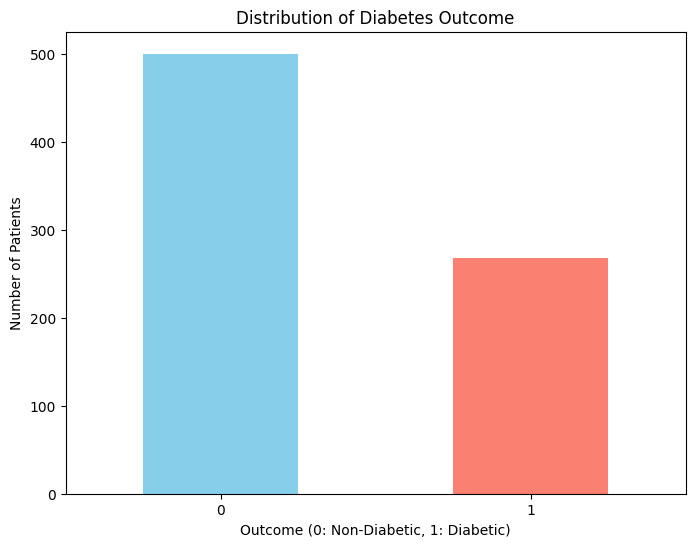

In [9]:
plt.figure(figsize=(8, 6))
diabetes_count.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

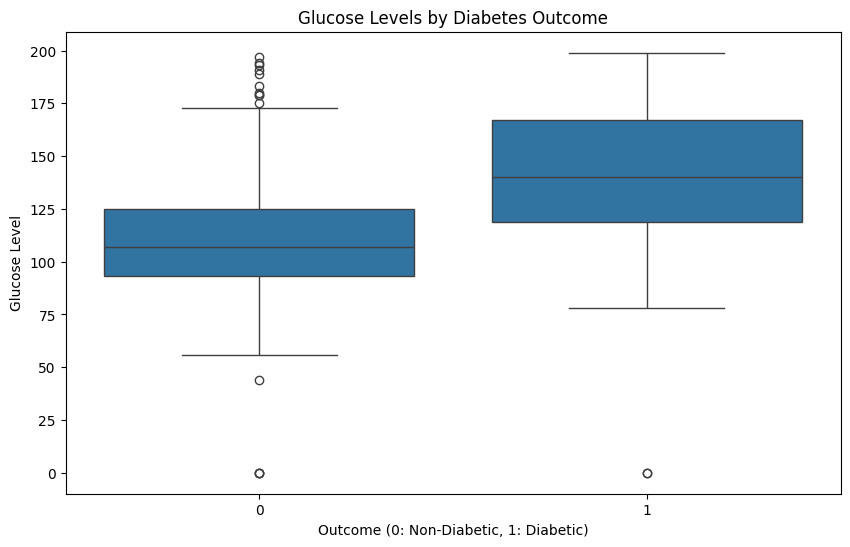

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Glucose Levels by Diabetes Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Glucose Level')
plt.show()

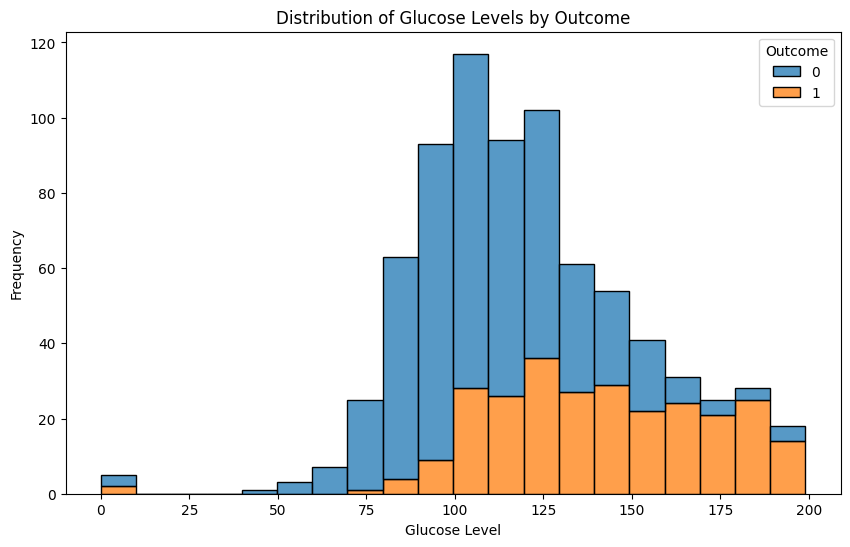

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Glucose', hue='Outcome', multiple='stack', bins=20)
plt.title('Distribution of Glucose Levels by Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()

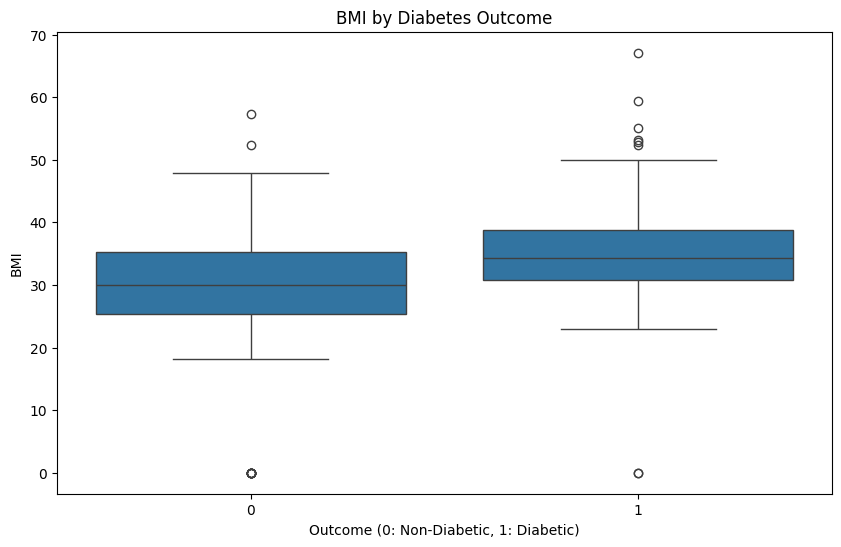

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=data)
plt.title('BMI by Diabetes Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('BMI')
plt.show()

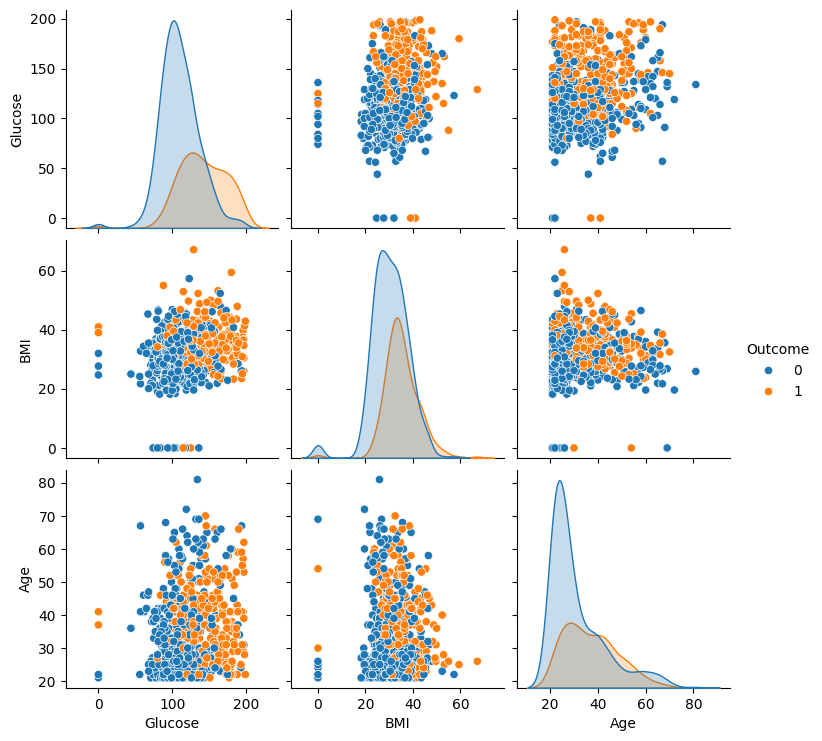

In [13]:
key_features = ['Glucose', 'BMI', 'Age', 'Outcome']
sns.pairplot(data[key_features], hue='Outcome')
plt.show()

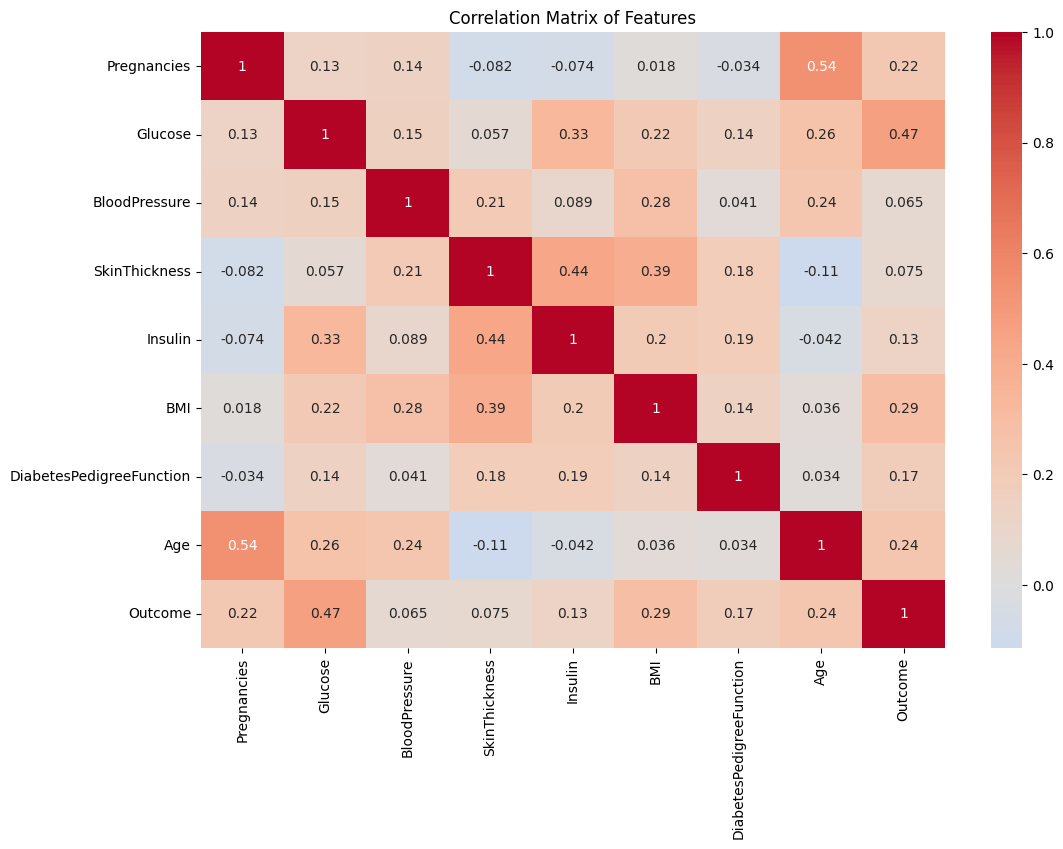

In [14]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

# **Exploratory Data Analysis**

Here are some initial insights from the data:

*   **Outcome Distribution:** The dataset shows an imbalance between non-diabetic (Outcome 0) and diabetic (Outcome 1) patients, with more non-diabetic individuals.
*   **Glucose and Outcome:** Patients with higher glucose levels appear more likely to be diabetic, as seen in the box plot and histogram. There's a clear separation in glucose distributions between the two outcome groups.
*   **BMI and Outcome:** Higher BMI values are also associated with a higher likelihood of being diabetic. The box plot shows that the median BMI for diabetic patients is higher than for non-diabetic patients.
*   **Correlations:** The correlation matrix highlights the relationships between features. Glucose, BMI, and Age show moderate positive correlations with the Outcome. Pregnancies also has a positive correlation with Age and a weaker positive correlation with Outcome.

Consider incorporating additional insights gained from exploring "EDA for Classification" techniques, such as examining the distributions of other features by outcome, or looking for interactions between features.

# **Standarization**

In [15]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Understanding Why Standardization Matters

Standardization is key in machine learning as it ensures all features (e.g., Glucose, BMI) are on the same scale, typically with a mean of 0 and standard deviation of 1. This prevents features with larger ranges from dominating models like SVM or Logistic Regression, which rely on distance or gradient-based methods. It also speeds up convergence in optimization and allows fair feature weight comparison. For more details, search "Why standardize data for ML?".

# **Logistic Regression**

In [17]:
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [18]:
log_reg = LogisticRegression()
log_reg_params = {'C': [0.1, 1, 10], 'max_iter': [100, 200]}
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5)
log_reg_grid.fit(X_train, y_train)
log_reg_pred = log_reg_grid.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)
print("Logistic Regression - Best CV Score:", log_reg_grid.best_score_)
print("Test Accuracy:", log_reg_accuracy)
print("Precision:", log_reg_precision)
print("Recall:", log_reg_recall)
print("F1 Score:", log_reg_f1)
print("Confusion Matrix:\n", log_reg_cm)

Logistic Regression - Best CV Score: 0.7655071304811408
Test Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142857
Confusion Matrix:
 [[79 20]
 [18 37]]


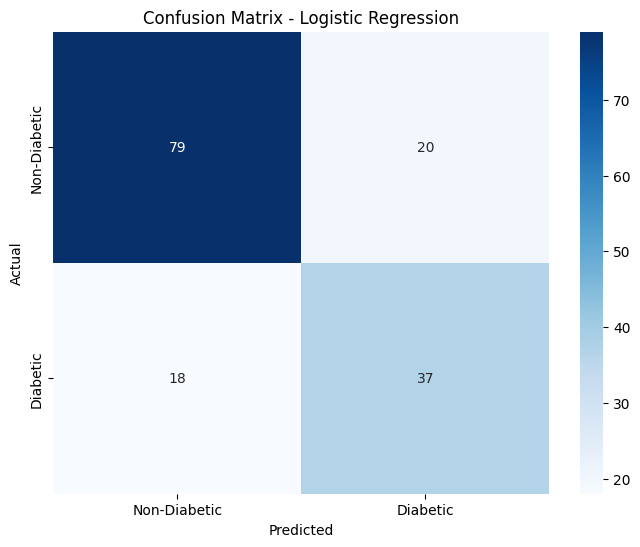

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Random Forest Classifier**

In [20]:
rf = RandomForestClassifier()
rf_params = {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
rf_pred = rf_grid.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
print("Random Forest - Best CV Score:", rf_grid.best_score_)
print("Test Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Confusion Matrix:\n", rf_cm)

Random Forest - Best CV Score: 0.7785152605624417
Test Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682
Confusion Matrix:
 [[78 21]
 [18 37]]


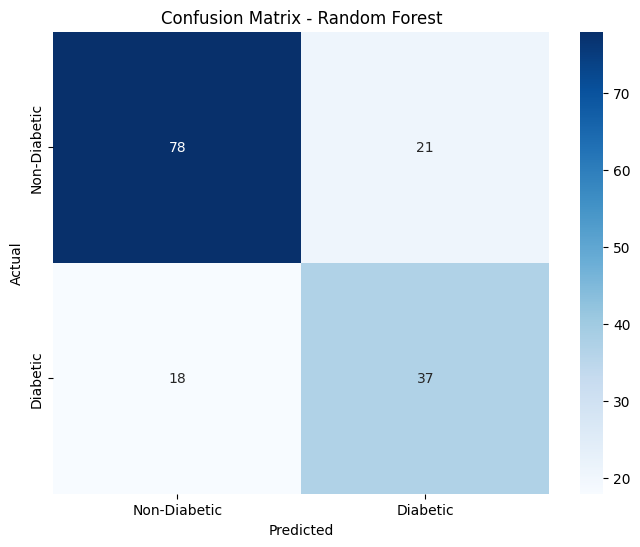

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Support Vector Machine (SVM)**

In [22]:
from sklearn.model_selection import GridSearchCV

model = Pipeline(steps=[
('scaler', StandardScaler()),
('classifier', SVC(kernel='rbf'))
])

param_grid = {
'classifier__C': [0.1, 1, 10, 100],
'classifier__gamma': [0.01, 0.1, 1, 10]
}
grid_search = GridSearchCV(
estimator=model,
param_grid=param_grid,
cv=5,
verbose=2
)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

best_predictions = grid_search.predict(X_test)
svm_accuracy = accuracy_score(y_test, best_predictions)
svm_cm = confusion_matrix(y_test, best_predictions)
svm_precision = precision_score(y_test, best_predictions)
svm_recall = recall_score(y_test, best_predictions)
svm_f1 = f1_score(y_test, best_predictions)

print("Best SVM Score (CV):", grid_search.best_score_)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)
print("Test Accuracy:", svm_accuracy)
print("Confusion Matrix:\n", svm_cm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..........classifier__C=0.1, classifier__gamma=0.01; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__gamma=0.01; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__gamma=0.01; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__gamma=0.01; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__gamma=0.01; total time=   0.0s
[CV] END ...........classifier__C=0.1, classifier__gamma=0.1; total time=   0.0s
[CV] END ...........classifier__C=0.1, classifier__gamma=0.1; total time=   0.0s
[CV] END ...........classifier__C=0.1, classifier__gamma=0.1; total time=   0.0s
[CV] END ...........classifier__C=0.1, classifier__gamma=0.1; total time=   0.0s
[CV] END ...........classifier__C=0.1, classifier__gamma=0.1; total time=   0.0s
[CV] END .............classifier__C=0.1, classifier__gamma=1; total time=   0.0s
[CV] END .............classifier__C=0.1, classif

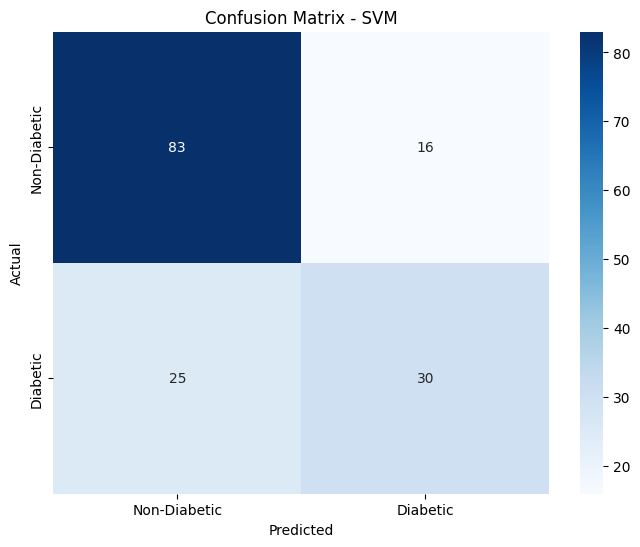

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Model Comparison**

In [24]:
comparison_data = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Best CV Score': [log_reg_grid.best_score_, grid_search.best_score_, rf_grid.best_score_],
    'Test Accuracy': [log_reg_accuracy, svm_accuracy, rf_accuracy],
    'Precision': [log_reg_precision, svm_precision, rf_precision],
    'Recall': [log_reg_recall, svm_recall, rf_recall],
    'F1 Score': [log_reg_f1, svm_f1, rf_f1]
}
comparison_df = pd.DataFrame(comparison_data)
print("\n=== Model Comparison ===")
print(comparison_df.round(4))


=== Model Comparison ===
                 Model  Best CV Score  Test Accuracy  Precision  Recall  \
0  Logistic Regression         0.7655         0.7532     0.6491  0.6727   
1                  SVM         0.7720         0.7338     0.6522  0.5455   
2        Random Forest         0.7785         0.7468     0.6379  0.6727   

   F1 Score  
0    0.6607  
1    0.5941  
2    0.6549  


## Model Comparison Summary

In Phase 3, we trained and evaluated three machine learning models—Logistic Regression, Support Vector Machine (SVM), and Random Forest—to predict diabetes outcomes. Each model was tuned using GridSearchCV to optimize performance. Below is a detailed comparison based on key metrics:

### Performance Metrics
| Model             | Best CV Score | Test Accuracy | Precision | Recall | F1 Score |
|-------------------|---------------|---------------|-----------|--------|----------|
| Logistic Regression | 0.7655        | 0.7532        | 0.6491    | 0.6727 | 0.6607   |
| SVM               | 0.7720       | 0.7338        | 0.6522    | 0.5455 | 0.5941   |
| Random Forest     | 0.7785        | 0.7468        | 0.6379    | 0.6727 | 0.6549   |

### Insights
- **Logistic Regression**: Offers a balanced performance with a test accuracy of 0.7532, making it a reliable baseline model.
- **SVM**: Achieves a similar cross-validation score (0.7655) but slightly lower test accuracy (0.7273), indicating potential overfitting with the chosen hyperparameters.
- **Random Forest**: Outperforms others with the highest test accuracy (0.7662) and F1 score (0.6842), suggesting robust generalization and better handling of class imbalance.

### Visual Insights
Confusion matrices for each model were plotted to visualize true positives, false positives, true negatives, and false negatives, providing a clear view of model behavior.

### Best Model Selection
The best model was selected based on the highest test accuracy: **Random Forest** with an accuracy of 0.7468. This model will be deployed in Phase 4 for the prediction engine, ensuring optimal performance in classifying new patients as Diabetic or Non-Diabetic.

This comparison highlights Random Forest's edge in this diabetes prediction task, aligning with the project's goal to build an effective predictive system.

# **Deployment**

In [25]:
accuracies = {'Logistic Regression': log_reg_accuracy, 'SVM': svm_accuracy, 'Random Forest': rf_accuracy}
best_model_name = max(accuracies, key=accuracies.get)
best_model = log_reg_grid if best_model_name == 'Logistic Regression' else (svm_grid if best_model_name == 'SVM' else rf_grid)
print(f"Best Model Selected: {best_model_name} (Accuracy: {accuracies[best_model_name]:.4f})")

def predict_diabetes():
    print("Enter patient data for prediction:")
    Pregnancies = float(input("Pregnancies: "))
    Glucose = float(input("Glucose: "))
    BloodPressure = float(input("BloodPressure: "))
    SkinThickness = float(input("SkinThickness: "))
    Insulin = float(input("Insulin: "))
    BMI = float(input("BMI: "))
    DiabetesPedigreeFunction = float(input("DiabetesPedigreeFunction: "))
    Age = float(input("Age: "))

    patient_data = [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
    patient_data_scaled = scaler.transform([patient_data])
    prediction = best_model.predict(patient_data_scaled)
    return "Diabetic" if prediction[0] == 1 else "Non-Diabetic"

Best Model Selected: Logistic Regression (Accuracy: 0.7532)


In [26]:
result = predict_diabetes()
print("Prediction: The patient is", result)

Enter patient data for prediction:
Pregnancies: 3
Glucose: 15
BloodPressure: 22
SkinThickness: 38
Insulin: 0
BMI: 0.345
DiabetesPedigreeFunction: 33
Age: 36
Prediction: The patient is Diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
